<a href="https://colab.research.google.com/github/Kushagratandon12/Advanced-Computer-Vision-with-TensorFlow/blob/main/Navigation_OBJ_Detect_V2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Important Library

In [ ]:
import glob
import json
import random
import numpy as np
import pandas as pd
from google.colab import drive 
drive.mount('KushDrive')
import matplotlib.pyplot as plt
!rm -rf /content/sample_data

Mounted at KushDrive


# Clone Darknet Model

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet/

# Download Dataset


In [ ]:
%cd data
!curl -L "https://app.roboflow.com/ds/tlnxadBYXZ?key=OMSuSkq7ri" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

`<object-class> <x> <y> <width> <height>`

Save Image Name Onto A File

In [ ]:
data_select = glob.glob('/content/darknet/data/train/*.jpg')
print(data_select)
train_txt = open("train.txt", "w")
for file_txt in data_select:
  train_txt.write(file_txt)
  train_txt.write('\n')

data_select = glob.glob('/content/darknet/data/train/*.jpg')
print(data_select)
test_txt = open("test.txt", "w")
for file_txt in data_select:
  test_txt.write(file_txt)
  test_txt.write('\n')

# Viewing Images Inside Dataset

In [ ]:
image_select = glob.glob('/content/darknet/data/train/*.jpg')
random.shuffle(image_select)
plt.figure(figsize=(15,15))
for i in range(3):
  plt.subplot(3,3,i+1)
  img = plt.imread(image_select[i])
  plt.title(img.shape)
  plt.imshow(img)

# Creating 2 Files Onto The Data Folder



1.   obj.names -> containing the class names i.e Navigation in this case
2.   obj.data  -> containing the path's where my data are present 



In [ ]:

'''
classes = 1
train = /content/darknet/data/train.txt
valid = /content/darknet/data/test.txt
names = /content/darknet/data/obj.names
backup = /content/KushDrive/MyDrive/Web_Detector
'''

# Download The Model Weights

In [ ]:
%cd ..
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
!cp /content/darknet/cfg/yolov4-custom.cfg /content/

# Make Darknet Ready To Run 


1.   Update The MakeFile -> GPU=1 , CUDNN = 1 , OPENCV=1 , LIBSO=1
2.   Update The Config File



In [ ]:
!make -j4

In [ ]:
! /content/darknet/darknet detector train /content/darknet/data/obj.data /content/yolov4-custom.cfg /content/darknet/yolov4.conv.137 -dont_show  -map

# Verify Model

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

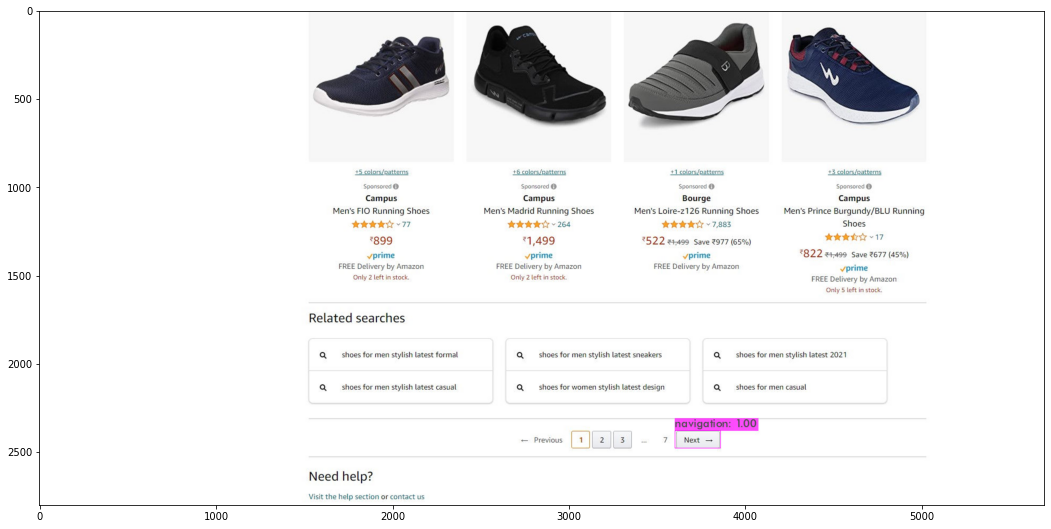

In [ ]:
!./darknet detector test /content/darknet/data/obj.data /content/yolov4-custom.cfg /content/KushDrive/MyDrive/Web_Detector/yolov4-custom_best.weights /content/data3.jpg -thresh 0.1 -dont_show
imShow('predictions.jpg')

# Next Object Detection Pixel Values 

In [ ]:
import darknet
network, class_names, colors = darknet.load_network('/content/yolov4-custom.cfg','data/obj.data','/content/drive/MyDrive/Yolo_Weights/yolov4-custom_best.weights')

In [ ]:
def image_detection(image, network, class_names, thresh=0.1):
    # Darknet doesn't accept numpy images.
    # Create one with image we reuse for each detect
    width = darknet.network_width(network)
    height = darknet.network_height(network)
    darknet_image = darknet.make_image(width, height, 3)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (width, height),
                               interpolation=cv2.INTER_LINEAR)

    darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())
    detections = darknet.detect_image(network, class_names, darknet_image, thresh=thresh)
    darknet.free_image(darknet_image)

    return detections

##MODEL WIDTH & HEIGHT 
model_width = darknet.network_width(network)
model_height = darknet.network_height(network)

print(model_width)
print(model_height)

# YOLO Video Rendering 

In [ ]:
!./darknet detector demo /content/darknet/data/obj.data /content/yolov4-custom.cfg /content/KushDrive/MyDrive/Web_Detector/yolov4-custom_best.weights -dont_show /content/test.mp4 -i 0 -out_filename res.avi

Streaming output truncated to the last 5000 lines.
FPS:45.8 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 99% 

FPS:45.5 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 96% 

FPS:45.2 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 96% 

FPS:44.9 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 96% 

FPS:44.7 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 96% 

FPS:44.5 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 96% 

FPS:44.4 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 100% 

FPS:44.4 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 100% 

FPS:44.4 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 100% 

FPS:44.2 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 100% 

FPS:43.8 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 100% 

FPS:43.6 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 100% 

FPS:43.6 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigation: 100% 

FPS:43.6 	 AVG_FPS:49.9

 cvWriteFrame 
Objects:

navigati